# Đặt câu hỏi, phân tích và trả lời

**Câu hỏi:** `Nhà sản xuất` có là một phần quan trọng để tạo nên những bộ phim được đánh giá cao hay không?

**Lợi ích:** 
- Định hướng chiến lược sản xuất phim:
  + Có thể xác định được `Nhà sản xuất` nào phổ biến và có đánh giá cao, từ đó lựa chọn `Nhà sản xuất` phù hợp cho các dự án làm phim.
  + Việc hiểu rõ các yếu tố này sẽ giúp các đạo diễn lựa chọn `Nhà sản xuất` có tiềm năng thành công, giảm thiểu rủi ro trong sản xuất phim.
- Nâng cao sự hiểu biết về các yếu tố ảnh hưởng đến đánh giá phim: Câu hỏi này sẽ giúp bạn hiểu ngoài những yếu tố khác thì liệu `Nhà sản xuất` có phải là một yếu tố quan trọng ảnh hưởng đến sự thành công của một bộ phim hay không. Từ đó, có thể hình thành những hệ thống, mô hình sau này.

**Cách trả lời:**
- Xem xét điểm đánh giá trung bình của các `nhà sản xuất` để thấy được những `nhà sản xuất` có xu hướng tạo ra những bộ Anime có điểm đánh giá cao.
- Xem xét các `nhà sản xuất` phổ biến để xem mức độ phân hóa điểm như thế nào, có rõ ràng hay không và có điểm đánh giá cao hay không.
- Xem xét mối quan hệ giữa điểm đánh giá, số lượt đánh giá và số lượng phim để có cái nhìn tổng quan về các `nhà sản xuất`.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Đọc dữ liệu

In [2]:
df = pd.read_csv('./anime_preprocessing.csv')
print(df.isnull().sum())

ID                    0
Title                 0
Episodes             78
Type                  0
Aired                 0
Producers             0
Studios               0
Source                0
Genres                0
Duration (mins)      15
Score                 0
Scored By             0
Rank               3889
Popularity            0
Year                  0
dtype: int64


## Xử lý

In [3]:
# Xóa toàn bộ dòng có giá trị NULL
cleaned_df = df.dropna()
print(cleaned_df.isnull().sum())  # Kiểm tra số lượng giá trị NULL còn lại
print(cleaned_df.shape)          # Kiểm tra kích thước dữ liệu sau khi làm sạch

ID                 0
Title              0
Episodes           0
Type               0
Aired              0
Producers          0
Studios            0
Source             0
Genres             0
Duration (mins)    0
Score              0
Scored By          0
Rank               0
Popularity         0
Year               0
dtype: int64
(12987, 15)


In [4]:
# Tính phần trăm các giá trị "Unknown" trong cột "Producers"
unknown_producers_count = cleaned_df[cleaned_df['Producers'] == 'UNKNOWN'].shape[0]  # Đếm số dòng có giá trị "UNKNOWN"
total_producers_count = cleaned_df.shape[0]  # Tổng số dòng
unknown_producers_percent = (unknown_producers_count / total_producers_count) * 100  # Tính phần trăm

# In kết quả
print(f"Phần trăm các giá trị 'UNKNOWN' trong cột 'Producers': {unknown_producers_percent:.2f}%")

Phần trăm các giá trị 'UNKNOWN' trong cột 'Producers': 37.80%


Số lượng giá trị "UNKNOWN" là khá lớn, cho thấy đa phần các phim chưa đề cập rõ ràng về `nhà sản xuất`, tuy nhiên, các dòng này cũng không cung cấp giá trị để chúng ta phân tích nên ta sẽ xóa các dòng "UNKNOWN" này.

In [5]:
cleaned_df = cleaned_df[cleaned_df['Producers'] != 'UNKNOWN']

In [6]:
# Check kết quả
print(cleaned_df[cleaned_df['Producers'] == 'UNKNOWN'].shape[0])

0


Giá trị trong cột Producers là 1 chuỗi với nhiều Producer khác nhau, vì vậy, nếu phân tích với nguyên chuỗi như thế này sẽ ảnh hưởng đến kết quả phân tích theo từng nhóm Producer khác nhau. Do đó, ta sẽ tách các Producers trong cùng 1 ô ra để dễ phân tích hơn.

In [7]:
cleaned_df['Producers'] = cleaned_df['Producers'].str.split(', ')
cleaned_df = cleaned_df.explode('Producers')
cleaned_df.head()
#Xem thử kết quả sau khi explode

,ID,Title,Episodes,Type,Aired,Producers,Studios,Source,Genres,Duration (mins),Score,Scored By,Rank,Popularity,Year
0,1.0,Cowboy Bebop,26.0,TV,"Apr 3, 1998 to Apr 24, 1999",Bandai Visual,Sunrise,Original,"Action, Award Winning, Sci-Fi",24.0,8.75,988000.0,482.0,43.0,1998.0
1,5.0,Cowboy Bebop: Tengoku no Tobira,1.0,Movie,"Sep 1, 2001",Sunrise,Bones,Original,"Action, Sci-Fi",115.0,8.38,219779.0,2092.0,631.0,2001.0
1,5.0,Cowboy Bebop: Tengoku no Tobira,1.0,Movie,"Sep 1, 2001",Bandai Visual,Bones,Original,"Action, Sci-Fi",115.0,8.38,219779.0,2092.0,631.0,2001.0
2,6.0,Trigun,26.0,TV,"Apr 1, 1998 to Sep 30, 1998",Victor Entertainment,Madhouse,Manga,"Action, Adventure, Sci-Fi",24.0,8.22,380049.0,3602.0,258.0,1998.0
3,7.0,Witch Hunter Robin,26.0,TV,"Jul 3, 2002 to Dec 25, 2002",Bandai Visual,Sunrise,Original,"Action, Drama, Mystery, Supernatural",25.0,7.24,44600.0,30982.0,1908.0,2002.0


## Phân tích

### Biểu đồ 1: Xây dựng điểm đánh giá trung bình của các `nhà sản xuất`

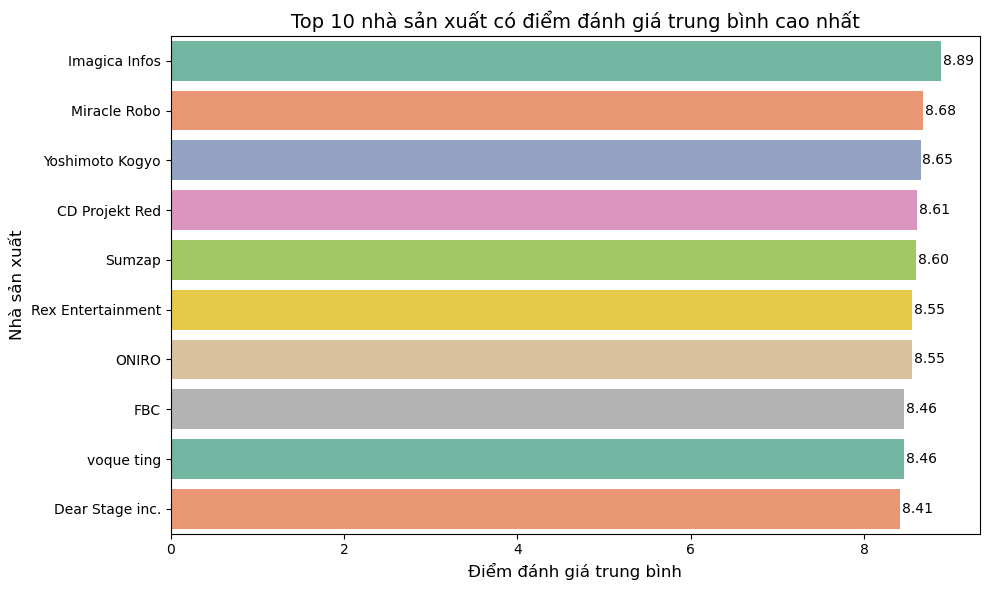

In [8]:
# Tính trung bình điểm số của từng Nhà sản xuất (Producers)
top_producers = (cleaned_df.groupby('Producers')['Score'].mean().sort_values(ascending=False).head(10))

# Vẽ biểu đồ cột ngang
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_producers.values, y=top_producers.index, hue=top_producers.index, palette="Set2", dodge=False)

# Thêm giá trị điểm trung bình vào các thanh
for i in range(len(top_producers)):
    ax.text(top_producers.values[i] + 0.02, i, f'{top_producers.values[i]:.2f}', ha='left', va='center', fontsize=10)

# Tiêu đề và nhãn trục
plt.title('Top 10 nhà sản xuất có điểm đánh giá trung bình cao nhất', fontsize=14)
plt.xlabel('Điểm đánh giá trung bình', fontsize=12)
plt.ylabel('Nhà sản xuất', fontsize=12)

plt.tight_layout()
plt.show()

In [9]:
# Tính điểm trung bình và số lượng phim của từng nhà sản xuất
producers_stats = cleaned_df.groupby('Producers').agg(
    avg_score=('Score', 'mean'),  # Điểm trung bình
    num_movies=('Producers', 'size')  # Số lượng phim
).reset_index()

# Sắp xếp theo điểm trung bình giảm dần
producers_stats_sorted = producers_stats.sort_values(by='avg_score', ascending=False)

# Lấy top nhà sản xuất có điểm đánh giá trung bình cao nhất (ví dụ: top 10)
top_producers_high_score = producers_stats_sorted.head(10)

# Hiển thị kết quả
print(top_producers_high_score)

              Producers  avg_score  num_movies
545       Imagica Infos   8.890000           1
738        Miracle Robo   8.680000           3
1315    Yoshimoto Kogyo   8.650000           1
198      CD Projekt Red   8.610000           1
1104             Sumzap   8.596667           3
912   Rex Entertainment   8.550000           1
822               ONIRO   8.550000           1
361                 FBC   8.460000           1
1374         voque ting   8.460000           3
301     Dear Stage inc.   8.410000           1


- Nhận xét:
  + Quan sát:
    + Imagica Infos đứng đầu với điểm đánh giá trung bình cao nhất, đạt 8.89.
    + Miracle Robo (8.68), Yoshimoto Kogyo (8.65), và CD Projekt Red (8.61) lần lượt xếp sau, với điểm đánh giá không quá chênh lệch.
    + Các nhà sản xuất từ thứ 5 đến thứ 10 có điểm đánh giá từ 8.60 đến 8.41.
    + Chênh lệch giữa nhà sản xuất cao nhất (8.89) và thấp nhất trong top 10 (8.41) là 0.48, cho thấy mức độ cạnh tranh giữa các nhà sản xuất này tương đối sát sao.
    + Điểm đánh giá trung bình của top 10 nhà sản xuất đều trên 8, phản ánh chất lượng sản phẩm/dịch vụ của họ được đánh giá rất cao.
    + Imagica Infos nổi bật hơn so với phần còn lại, trong khi các nhà sản xuất còn lại (đặc biệt từ Sumzap đến Dear Stage inc.) có mức điểm gần nhau hơn, thể hiện sự đồng đều về chất lượng.
    + Tuy nhiên, số lượng phim do các nhà sản xuất này phát hành chỉ từ 1 đến 3 phim, vì vậy, điểm đánh giá trung bình có thể bị ảnh hưởng bởi sự thiên lệch: Nếu một phim được đánh giá cao vượt trội, nó sẽ khiến điểm trung bình tăng lên đáng kể. Ngược lại, nếu có nhiều phim hơn, điểm đánh giá trung bình sẽ phản ánh chính xác và toàn diện hơn về chất lượng của nhà sản xuất nên mức điểm có thể thấp hơn và không nằm trong top này.
  + Ý nghĩa: Các nhà sản xuất với các sản phẩm có điểm đánh giá trung bình cao thì khá đa dạng về các phong cách, đều đó cho thấy điểm đánh giá trung bình theo nhà sản xuất không hề tập trung vào một nhóm nhà sản xuất nào mà khá đồng đều. Tuy nhiên, các nhà sản xuất này có số lượng phim ít có thể khiến kết quả trở nên không đồng đều và khó so sánh một cách toàn diện giữa các nhà sản xuất. Các nhà sản xuất trong biểu đồ tuy được đánh giá cao, nhưng cần thời gian và số lượng sản phẩm lớn hơn để khẳng định vị trí bền vững trong ngành.

### Biểu đồ 2: Phân phối điểm số của các `nhà sản xuất`

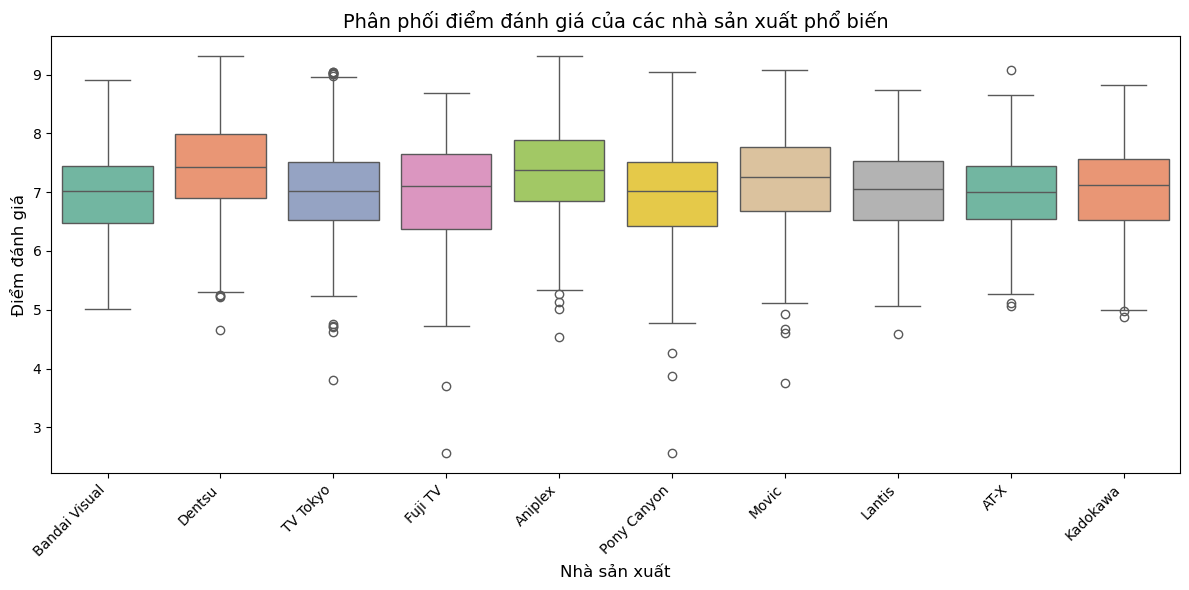

In [10]:
# Lấy top các nhà sản xuất có nhiều bộ phim nhất
producers_counts = cleaned_df['Producers'].value_counts()
top_producers = producers_counts.head(10).index
filtered_df = cleaned_df[cleaned_df['Producers'].isin(top_producers)]

# Vẽ biểu đồ hộp
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='Producers', y='Score', hue='Producers', palette='Set2', dodge=False)

plt.title('Phân phối điểm đánh giá của các nhà sản xuất phổ biến', fontsize=14)
plt.xlabel('Nhà sản xuất', fontsize=12)
plt.ylabel('Điểm đánh giá', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- Nhận xét
  + Quan sát:
    + Phân phối điểm đánh giá:
      + Dentsu: Điểm trung vị khá cao, khoảng 7.5, với phạm vi phân phối tương đối hẹp. Phân phối đồng đều hơn so với các nhà sản xuất khác, ít outliers.
      + Aniplex cũng có mức điểm trung vị khá cao 7.3, với phạm vi phân phối cũng tương đối hẹp.
      + Fuji TV có điểm trung vị ở mức 7.0 và phạm vi phân phối khá rộng, cho thấy các sản phẩm của nhà sản xuất này còn có sự phân hóa cao.
      + Bandai Visual có điểm trung vị ở mức 7.0, phạm vi phân phối khá hẹp và không có outliers chứng tỏ chất lượng các sản phẩm của nhà sản xuất này tuy không cao nhưng rất đồng đều và giữ chất lượng sản phẩm của mình.
      + Các nhà sản xuất khác có điểm trung vị ở mức 7.0, phạm vi phân phối tương đối hẹp.
  + Ý nghĩa:
    + Đánh giá chất lượng của nhà sản xuất:
      + Nhà sản xuất nổi bật: Dentsu và Aniplex có độ ổn định cao, với điểm trung vị và phân phối đồng đều, ít sản phẩm bị đánh giá thấp.
      + Một số nhà sản xuất khác cần cải thiện hơn trong các tác phẩm của mình, mặc dù có một số sản phẩm được đánh giá cao, nhưng lại có nhiều phim bị điểm thấp, dẫn đến sự thiếu đồng đều về chất lượng.
    + Ta thấy các nhà sản xuất phổ biến có phổ điểm tương đối chỉ từ 7 đến 8 điểm, cho thấy mặt bằng chung các sản phẩm Anime ở mức ổn. Tuy nhiên, có sự không đồng đều và phân hóa cao.

### Biểu đồ 3: Mối quan hệ giữa số lượng phim, điểm trung bình và số lượt đánh giá của nhóm nhà sản xuất có điểm đánh giá trung bình cao nhất và nhóm nhà sản xuất phổ biến nhất

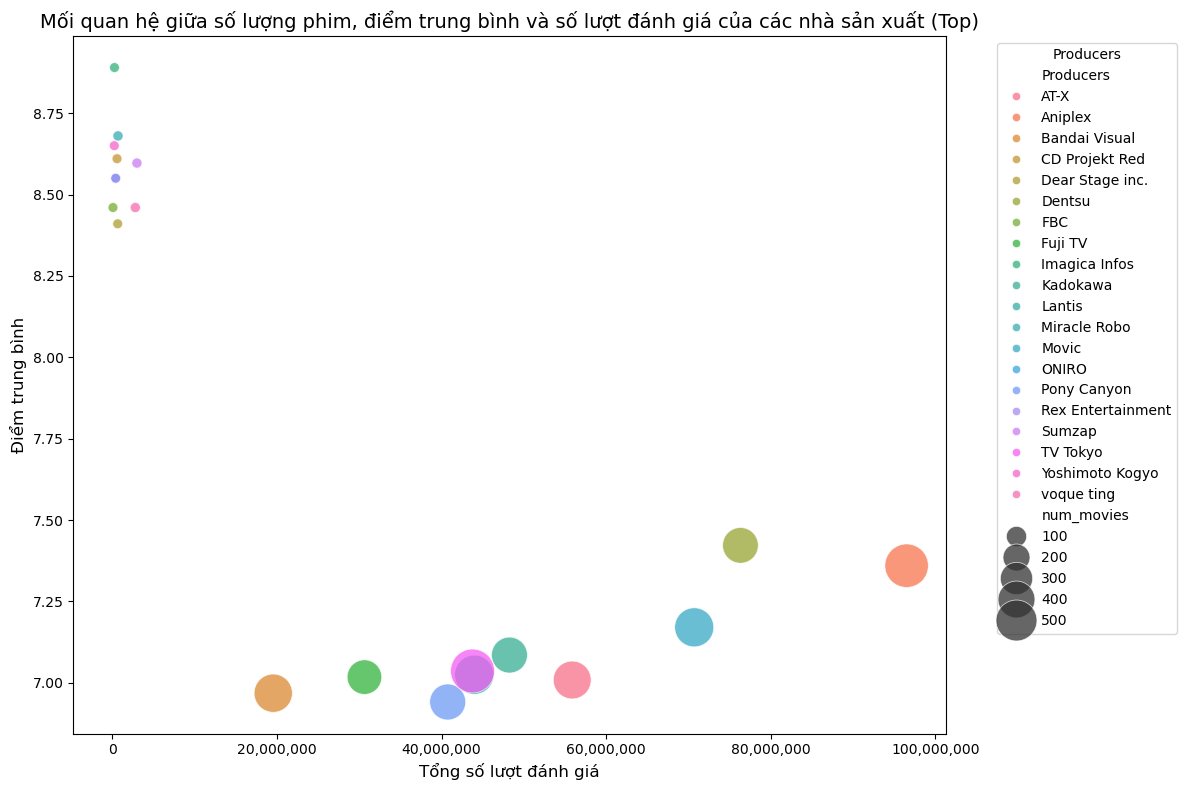

In [11]:
import matplotlib.ticker as ticker

# Tính top nhà sản xuất theo điểm trung bình
top_score_producers = (
    cleaned_df.groupby('Producers')['Score'].mean()
    .sort_values(ascending=False)
    .head(10).index
)

# Tính top nhà sản xuất theo số lượng phim
top_count_producers = cleaned_df['Producers'].value_counts().head(10).index

# Kết hợp hai danh sách
top_producers = set(top_score_producers).union(top_count_producers)

# Lọc dữ liệu cho các nhà sản xuất này
filtered_df = cleaned_df[cleaned_df['Producers'].isin(top_producers)]

# Tính số lượng phim, điểm trung bình, tổng số lượt đánh giá
producers_stats = filtered_df.groupby('Producers').agg(
    num_movies=('Producers', 'size'),
    avg_score=('Score', 'mean'),
    total_reviews=('Scored By', 'sum')
).reset_index()

# Vẽ biểu đồ Bubble Plot
plt.figure(figsize=(12, 8))
bubble_plot = sns.scatterplot(
    data=producers_stats,
    x='total_reviews',
    y='avg_score',
    size='num_movies',
    sizes=(50, 1000),
    hue='Producers',
    palette=sns.color_palette("husl", len(producers_stats)),
    legend='brief', 
    alpha=0.75
)

# Tùy chỉnh tiêu đề và nhãn
plt.title('Mối quan hệ giữa số lượng phim, điểm trung bình và số lượt đánh giá của các nhà sản xuất (Top)', fontsize=14)
plt.xlabel('Tổng số lượt đánh giá', fontsize=12)
plt.ylabel('Điểm trung bình', fontsize=12)

# Định dạng trục x để hiển thị rõ số lớn
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))  # Thêm dấu phẩy ngăn cách hàng nghìn

# Cấu hình legend
handles, labels = bubble_plot.get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, title='Producers', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Tinh chỉnh bố cục
plt.tight_layout()
plt.show()

- Nhận xét
  + Quan sát:
    + Phân nhóm nhà sản xuất theo xu hướng nổi bật:
      + Nhà sản xuất chất lượng cao, nhưng ít phổ biến: Các đại diện: Imagica Infos. Điểm trung bình rất cao (trên 8.5) nhưng tổng số lượt đánh giá thấp và chỉ có một số lượng phim hạn chế. Các nhà sản xuất này có khả năng tạo ra các sản phẩm chất lượng, nhưng do quy mô nhỏ và phạm vi phát hành hạn chế, họ chưa có nhiều khán giả. Nếu mở rộng hoạt động sản xuất và quảng bá tốt hơn, họ có tiềm năng tăng sự phổ biến.
      + Nhà sản xuất phổ biến nhưng chất lượng trung bình: Các đại diện: Kadokawa, Bandai Visual, Aniplex. Số lượng phim lớn và tổng số lượt đánh giá cao (trên 40 triệu, thậm chí Kadokawa vượt 80 triệu) nhưng điểm trung bình chỉ từ 7.0 đến 7.5. Đây là các nhà sản xuất lớn, phát hành nhiều sản phẩm đa dạng để thu hút khán giả rộng rãi, nhưng chất lượng không ổn định. Một số phim có thể đạt điểm cao, nhưng nhiều phim khác lại bị đánh giá thấp, kéo điểm trung bình xuống.
      + Nhà sản xuất ổn định và cân bằng: Các đại diện: TV Tokyo, Dentsu, Fuji TV. Số lượng phim vừa phải và điểm trung bình ổn định, từ 7.5 đến 8.0. Tổng số lượt đánh giá ở mức trung bình hoặc cao (30-60 triệu). Đây là các nhà sản xuất có sự cân bằng tốt giữa số lượng và chất lượng. Họ không chạy theo sản lượng quá lớn mà vẫn tập trung vào việc duy trì uy tín và sự hài lòng của khán giả. TV Tokyo và Dentsu nổi bật vì vừa có lượng khán giả lớn, vừa đảm bảo mức đánh giá cao.
  + Mối quan hệ giữa các yếu tố trong biểu đồ:
    + Số lượng và chất lượng: Nhà sản xuất nhiều phim hơn (như Kadokawa) thường khó duy trì chất lượng đồng đều, trong khi ít phim hơn (như Imagica Infos) lại đạt điểm cao.
    + Lượt đánh giá và mức độ phổ biến: Lượt đánh giá cao phản ánh độ phổ biến, nhưng không đảm bảo chất lượng (ví dụ: Kadokawa).
  + Ý nghĩa:
    + Gợi ý chiến lược:
      + Đối với nhà sản xuất lớn: Tập trung vào việc nâng cao chất lượng sản phẩm, giảm số lượng phim sản xuất trong thời gian ngắn để đảm bảo tính đồng đều. Khai thác lại các phim có điểm cao để tối ưu hóa danh tiếng và giữ chân khán giả.
      + Đối với nhà sản xuất nhỏ: Đầu tư vào marketing và mở rộng phạm vi phát hành để tăng số lượt đánh giá. Hợp tác với các nhà phân phối lớn để tiếp cận nhiều khán giả hơn.
      + Đối với các nhà sản xuất cân bằng: Tiếp tục duy trì chiến lược sản xuất ổn định, đảm bảo điểm trung bình cao để giữ vững vị thế. Cân nhắc mở rộng thêm số lượng phim để tăng thị phần nhưng không làm giảm chất lượng. 
  + Như vậy, nhìn chung các phim có sự chênh lệch rất cao giữa các nhà sản xuất và trong từng nhà sản xuất.

## Kết luận

- Các phim Anime theo `nhà sản xuất` có sự phân hóa cao và không đồng đều giữa chất lượng và số lượng tác phẩm nên chủ yếu đánh giá các tác phẩm dựa trên nhiều tiêu chí khác nữa như thể loại, thời lượng, nguồn tài liệu,...
- Khi lựa chọn `nhà sản xuất`, ta cũng nên xem xét nhiều yếu tố khác để đảm bảo chất lượng của bộ phim mà người dùng muốn xem.
- Như vậy, có thể thấy rằng `nhà sản xuất` không phải là tiêu chí quan trọng để tạo nên những bộ phim thành công.